# 180437U

## EN2550_Assignment5
## Object Counting on a Convey Belt

## 1.0.1 Let’s first import required librarie

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1.0.2 Let’s load and visualize the template image and the convey belt snapshot at a given time.

In [2]:
#Below function is defined to plot given two images because it is used repeatedly
def plotter(img1,img2):
    fig, ax = plt. subplots(1,2,figsize=(10,10))
    ax[0].imshow(img1, cmap='gray')
    ax[1].imshow(img2, cmap='gray')
    plt.show()
    return

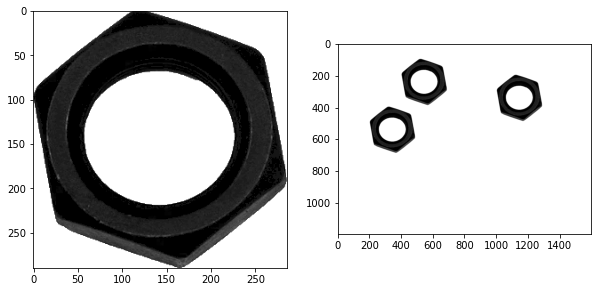

In [3]:
template_im = cv.imread(r'template.png', cv.IMREAD_GRAYSCALE)
belt_im = cv.imread(r'belt.png', cv.IMREAD_GRAYSCALE)
plotter(template_im,belt_im)

## 1.1 Part-I :

### 1.1.1 Otsu’s thresholding

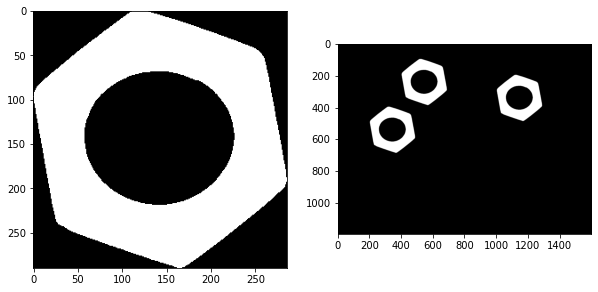

In [4]:
th_t, img_t = cv.threshold(template_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
th_b, img_b = cv.threshold(belt_im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plotter(img_t,img_b)

### 1.1.2 Morphological closing

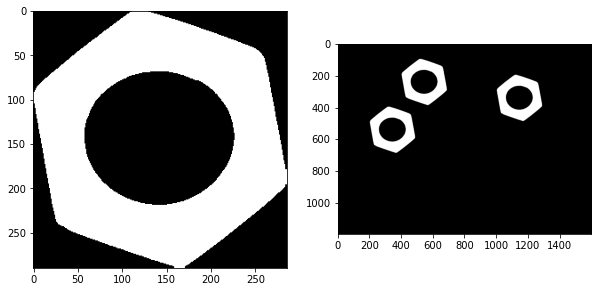

In [5]:
kernel = np.ones((3,3),np.uint8)
closing_t = cv.morphologyEx(img_t, cv.MORPH_CLOSE, kernel)
closing_b = cv.morphologyEx(img_b, cv.MORPH_CLOSE, kernel)
plotter(closing_t,closing_b)

### 1.1.3 Connected component analysis

In [6]:
retval_t, labels_t, stats_t, centroids_t = cv.connectedComponentsWithStats(closing_t)
retval_b, labels_b, stats_b, centroids_b = cv.connectedComponentsWithStats(closing_b)
print("number_of_components_t : ",retval_t)
print("number_of_components_b : ",retval_b)
print("number_of_nuts_t : ",retval_t-1)
print("number_of_nuts_b : ",retval_b-1)
print("stats_t : \n",stats_t )
print("stats_b : \n",stats_b )
print("centroids_t : \n",centroids_t )
print("centroids_b : \n",centroids_b )

number_of_components_t :  2
number_of_components_b :  4
number_of_nuts_t :  1
number_of_nuts_b :  3
stats_t : 
 [[    0     0   286   290 42290]
 [    0     0   286   290 40650]]
stats_b : 
 [[      0       0    1600    1200 1798161]
 [    400     100     286     290   40613]
 [   1000     200     286     290   40613]
 [    200     400     286     290   40613]]
centroids_t : 
 [[142.18770395 145.19172381]
 [142.82489545 143.780369  ]]
centroids_b : 
 [[ 807.85728475  614.56805258]
 [ 542.82567158  243.78479797]
 [1142.82567158  343.78479797]
 [ 342.82567158  543.78479797]]



## • How many connected componets are detected in each image?

retval_a and retval_b returns number of components are in each image.<br> 
<br>
So number of connected components in the template image = **2**<br>
   number of connected components in the belt image     = **4**<br>
   
But we have to consider that background of the image is also counted as a components in both cases, when counting nuts.<br>
<br>
So number of nuts in the template image = **1**<br>
   number of nuts in the belt image     = **3**<br>

## • What are the statistics? Interpret these statistics.

Each row of statics of an image contains statics of each component in that image.<br>
Each column contains the values for the following parameters respectively.<br>

1. The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
2. The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
3. The horizontal size of the bounding box.
4. The vertical size of the bounding box.
5. The total area (in pixels) of the connected component.

**Interpretation of stats_t**<br>
Since first row of the stats corresponds to the statictics of the background its leftmost x coordinate and topmost y coordinates are 0.<br>Height and width is same size of the total image. Area has nearly half of the total number of pixels of the full image as the nut and background has nearly same number of pixels per each component.<br>
Leftmost x coordinate , topmost y coordinate , width and height are eqaul to the background component because the nut extends out of the image.<br>

**Interpretation of stats_b**<br>
First row corresponds to the background component and other three correspond to the three nuts in image.<br>
As we can observe height, width and areas are same for the three nuts because approximately they are of the same size.

## • What are the centroids?

Each row contain the x,y coordinates of the centroid of each component.

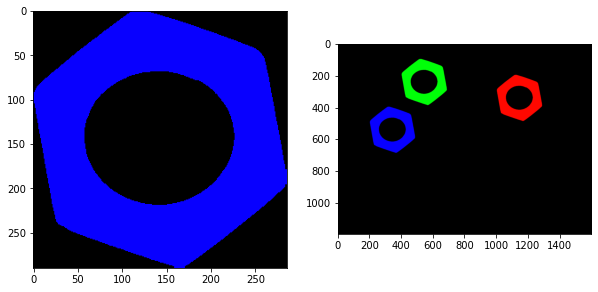

In [7]:
# visualizing seperate components in a black background

label_hue = np.uint8(179*labels_t/np.max(labels_t))
blank_ch = 255*np.ones_like(label_hue)
labeled_img_t = cv.merge([label_hue, blank_ch, blank_ch])
# Converting cvt to BGR
labeled_img_t = cv.cvtColor(labeled_img_t, cv.COLOR_HSV2BGR)
# set bg label to black
labeled_img_t[label_hue==0] = 0

label_hue = np.uint8(179*labels_b/np.max(labels_b))
blank_ch = 255*np.ones_like(label_hue)
labeled_img_b = cv.merge([label_hue, blank_ch, blank_ch])
# Converting cvt to BGR
labeled_img_b = cv.cvtColor(labeled_img_b, cv.COLOR_HSV2BGR)
# set bg label to black
labeled_img_b[label_hue==0] = 0
plotter(labeled_img_t,labeled_img_b)

### 1.1.4 Contour analysis

In [8]:
contours_t, hierarchy_t = cv.findContours(closing_t, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
contours_b, hierarchy_b = cv.findContours(closing_b, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

## I used cv.RETR_EXTERNAL as the RetrievalMode to get only the extreme outer contours.

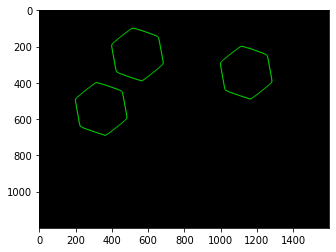

In [9]:
# Visualizing contours
im_contours_belt = np.zeros((belt_im.shape[0],belt_im.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_b, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)

### 1.1.5 Count the number of matching hexagonal nuts in belt.png.

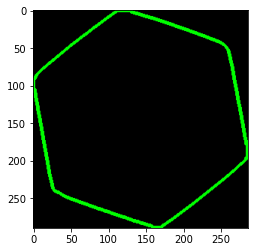

In [10]:
# Visualizing the extreme outer contours of template image.
im_contours_belt = np.zeros((template_im.shape[0],template_im.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours_belt, contours_t, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts)

In [11]:
label = 1 # remember that the label of the background is 0
belt = ((labels_b >= label)*255).astype('uint8')
belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # This only returns the contours of the outermost boundry of a component
for j,c in enumerate(belt_cont):
    print(cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0))

0.00010071698397173812
0.00010071698397950968
0.00010071698397506879


### When two contours are similar, matchShapes function returns a value closer to zero. The smaller the value,more the two contours are similar.

In [12]:
# Finding the number of nuts in the belt image.a
nut_count=0 # nut counting variable
for j,c in enumerate(belt_cont):
    match_score=cv.matchShapes(contours_t[0], c, cv.CONTOURS_MATCH_I1, 0.0) #getting match score
    if match_score<0.00010071698398:
        nut_count+=1 #accumilating nut count when match score is lower than the given value
print("Number of nuts : ",nut_count)

Number of nuts :  3


## 1.2 Part - II

### 1.2.1 Frame tracking through image moments.

In [13]:
 ca = cv.contourArea(contours_b[1])
 print(ca)

60059.5


In [14]:
M = cv.moments(contours_b[1])
cx, cy = int(M['m10']/M['m00']) , int(M['m01']/M['m00'])
print("Dictionary of moments \n",M ,"\n")
print("Centroid coordinates", (cx, cy))

Dictionary of moments 
 {'m00': 60059.5, 'm10': 68611440.0, 'm01': 20630899.0, 'm20': 78674593714.08333, 'm11': 23570444412.958332, 'm02': 7371056517.75, 'm30': 90547806168118.9, 'm21': 27029588543966.05, 'm12': 8421847359458.05, 'm03': 2727315587271.4004, 'mu20': 293493324.0767517, 'mu11': 1888416.2457389832, 'mu02': 284184440.0903292, 'mu30': 79907847.171875, 'mu21': -52573545.19958496, 'mu12': -79587217.90814209, 'mu03': 62055311.556640625, 'nu20': 0.08136447047416653, 'nu11': 0.0005235212363099092, 'nu02': 0.07878379025377881, 'nu30': 9.039307270173402e-05, 'nu21': -5.947206014938962e-05, 'nu12': -9.003037159824198e-05, 'nu03': 7.019799040515873e-05} 

Centroid coordinates (1142, 343)


In [15]:
count = 1 #number of contours
object_prev_frame = np.array([cx, cy, ca, count])
delta_x = 15

## 1.3 Part - III

### 1.3.1 1. Implement the function get_indexed_image, which takes an image as the input, performs thresholding, closing, and connected component analysis and return retval, labels, stats, centroids. (Grading)

In [16]:
def get_indexed_image(im):
    th_im, img_im = cv.threshold(im,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU) # Thresholding the image
    kernel = np.ones((3,3),np.uint8)                                           # Creating a kernal to apply morphological transform
    closing_im = cv.morphologyEx(img_im, cv.MORPH_CLOSE, kernel)               #  applying the morphological transform(closing)
    retval, labels, stats, centroids = cv.connectedComponentsWithStats(closing_im) # applying connected component analysis
    return retval, labels, stats, centroids

### 1.3.2 2. Implement the function is_new, which checks the dissimilarity between 2 vectors. (Grading)

In [17]:
def is_new(a, b, delta, i):
    for count in range(a.shape[0]):      # Loop to check each vector in a
        temp=True
        for count0 in range(i.shape[0]): # checking given elements(specified by i) in each vector with coresponding delta values.
            if np.abs(a[count,i[count0]]-b[i[count0]])>delta[count0]:
                temp=False
        if temp:
            return False                # returning False if there is at least one vector similar to b
    return True

In [18]:
# check is_new expected answer False
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])
assert is_new(a, b, delta, i) == False, " Check the function "

### 1.3.3 3. If the array a is in the shape of (number of nuts , len(object_prev_frame)) ( i.e. array a is made by stacking all the object_prev_frame for each frame. If b is in the form of \[ cx, cy, ca, count], write the function prev_index to find the index of a particular nut in the previous frame. (Grading)

In [19]:
def prev_index(a, b, delta, i):
    """ Returns Previous Index
    Returns the index of the apppearance of the object in the previous frame.
    (See thee example in the next cell)
    """
    index = -1
    for count in range(a.shape[0]):
        if not(is_new(np.array([a[count]]), b, delta, i)): #checking if a  contour is similar to b using is_new function because it returns False if they are similar
            index=count                                    #assigning the count variable as the index of the previous contour
    return index

In [20]:
# check prev_index expected answer 1
a = np.array([[1.36100e+03, 5.53000e+02, 5.99245e+04, 2.00000e+00],
[7.61000e+02, 4.53000e+02, 5.99385e+04, 1.00000e+00],
[1.55200e+03, 2.43000e+02, 6.00585e+04, 3.00000e+00]])
b = np.array([7.51000e+02, 4.53000e+02, 5.99385e+04, 3.00000e+00])
delta = np.array([delta_x])
i = np.array([0])
assert prev_index(a,b,delta,i) == 1, " Check the function "

### 1.3.4 3. Implement a code to detect hexagonal nuts in a moving convey belt. (Grading)

## 1.4

In [21]:
cap = cv.VideoCapture('conveyor_with_rotation.mp4')                                                 # loading the video
while cap.isOpened():
    ret, frame = cap.read()                                                                         # retrieving the current frame
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)                                                      # converting the frame to grayscale
    retval, labels, stats, centroids=get_indexed_image(gray)                                        # generating the labeled image
    belt = ((labels >= 1)*255).astype('uint8')
    belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # finding contours in the image
    im_contours_belt = np.zeros((frame.shape[0],frame.shape[1],3), np.uint8)                        # creating a black image to draw contours
    conts = cv.drawContours(im_contours_belt, belt_cont, -1, (0,255,0), 3).astype('uint8')          # drawing contours
    cv.namedWindow("frame", cv.WINDOW_NORMAL) 
    cv.imshow("frame",conts)                                                                        # showing the contours
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


## 1.5 Object detection and tracking

In [24]:
#..................................................................................................Finding contour of the template image

retval_t, labels_t, stats_t, centroids_t=get_indexed_image(template_im)
belt_t = ((labels_t >= 1)*255).astype('uint8')
belt_t_cont, template_t_hierarchy = cv.findContours(belt_t, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

#..................................................................................................Initializing parameters and variables

a=np.array([])                  # to store moment data vectors of identified contours
i = np.array([0,1,2])           # indexs of the elements we are checking to find the similar contours. Here I have used cx, cy and area
delta = np.array([15,15,800])   # delta values(thresholds) corresponding to above elements, to check two countours are similar
frame_num=0                     # to keep track of the frame number
anchor=(50,1050)                # coordinates of the anchor point to show annotations
font_size=1.5                   # font size of annotations
thickness=2                     # thickness of annotation lines

#..................................................................................................

cap = cv.VideoCapture('conveyor_with_rotation.mp4') # loading the video
#....................................................................................................Creating the output video
out = cv.VideoWriter('180437U_en2550_a05.mp4', -1 , 30.0, (1920,1080))
#....................................................................................................Main Loop
while cap.isOpened():
    ret, frame = cap.read() # reading the current frame
    frame_num+=1            # updating the frame number
    indent=0                # variable to update spaces between lines of the annotations
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    #................................................................................................ Finding contours

    gray=cv.cvtColor(frame, cv.COLOR_BGR2GRAY)                                                      # converting the frame to grayscale
    retval, labels, stats, centroids=get_indexed_image(gray)                                        # generating the labeled image
    belt = ((labels >= 1)*255).astype('uint8')
    belt_cont, template_hierarchy = cv.findContours(belt, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # finding contours in the image
    im_contours_belt = np.zeros((frame.shape[0],frame.shape[1],3), np.uint8)#.........................Creating a black image to draw contours

    #................................................................................................. # Checking for each contour in the current frame
    for cont in belt_cont:
        text="" # string variable to show data about detected contour
        if cv.matchShapes(belt_t_cont[0], cont, cv.CONTOURS_MATCH_I1, 0.0)>0.0008:#....................Checking if a contour is similar to the template contour
            continue
        #..............................................................................................Calculating moments
        ca = cv.contourArea(cont)
        M = cv.moments(cont)
        if M['m00']==0:
            continue
        cx, cy = int(M['m10']/M['m00']) , int(M['m01']/M['m00'])
        count = 1 #number of contours
        object_curr_frame = np.array([cx, cy, ca, count])

        #.............................................................................................
        if a.shape[0]==0:       # checking if a is empty and appending the moment data vector of first contour(nut) detected
            a=(np.append(a,object_curr_frame)).reshape((1,4))
            index=a.shape[0]-1  # finding the index of the new contour

        elif is_new(a, object_curr_frame, delta, i):                    # checking if a contour in the current frame has been detected before
            a=np.concatenate((a,np.array([object_curr_frame])),axis=0)  # if it is a new nut(contour) appending the moment data vector of th new nut to a
            index=a.shape[0]-1                                          # finding the index of the contour
        else:
            index=prev_index(a, object_curr_frame, delta, i)   # if it is not new and it has been detected in a earliar frame, finding the index of that contour in a
            a[index]=object_curr_frame                         # updating the moment data vector of that index according to the new position and other data of the current frame

        #..............................................................................................
        font = cv.FONT_HERSHEY_SIMPLEX
        cv.putText(im_contours_belt,str(index+1),(cx,cy), font, 2,(255,0,255),2,cv.LINE_AA)# showing the indexes of contours, taking their centroids as anchor points
        text+="Object "+str(index+1)+" "+str(a[index,0])+", "+str(a[index,1])+", "+str(a[index,2])# creating the output text for each contour in the current frame
        cv.putText(im_contours_belt,text,(anchor[0],anchor[1]-indent), font, 1.5,(255,0,255),2,cv.LINE_AA)# showing the data of contours in current frame
        indent+=50 #updating indent to maintain the spaces between lines of two contours
        
    
    cv.putText(im_contours_belt,"Frame "+str(frame_num),(anchor[0],anchor[1]-indent), font, 1.5,(0,255,0),2,cv.LINE_AA) #showing the frame number
    cv.putText(im_contours_belt,"Index Num : "+str(180437)+"U",(anchor[0],50), font, 1.5,(255,255,255),2,cv.LINE_AA)    #showing the index number
    conts = cv.drawContours(im_contours_belt, belt_cont, -1, (0,255,0), 3).astype('uint8')                              #drawing the contours
    cv.namedWindow("frame", cv.WINDOW_NORMAL)    
    cv.imshow("frame",conts)                                                                                            #showing the current frame
    out.write(conts)                                                                                              #writing the current frame to the output video file
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...
